In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [33]:
df=pd.read_csv('/kaggle/input/asl-citizen-msasl-wlasl-gloss-count/asl_citizen_msasl_wsasl_gloss_count.csv')
df.head()

,Gloss,Count,source
0,envelope,160,"asl_citizen,msasl,wlasl"
1,pineapple,159,"asl_citizen,msasl"
2,erase,157,"asl_citizen,wlasl"
3,shave,157,"asl_citizen,wlasl"
4,dog,152,"asl_citizen,msasl,wlasl"


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079 entries, 0 to 3078
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gloss   3079 non-null   object
 1   Count   3079 non-null   int64 
 2   source  3079 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.3+ KB


In [35]:
df.describe()

,Count
count,3079.000000
mean,34.180253
std,23.124750
min,1.000000
25%,19.500000
50%,31.000000
75%,43.000000
max,160.000000


In [36]:
df.isnull().sum()

Gloss     0
Count     0
source    0
dtype: int64

In [37]:
df.duplicated().any()

False

In [38]:
# Total number of unique glosses
print("Total unique glosses:", df['Gloss'].nunique())

# Total counts across all glosses
print("Total signs (sum of counts):", df['Count'].sum())

# Most frequent signs
print("Top 10 most frequent glosses:")
print(df.sort_values(by='Count', ascending=False).head(10))

# Distribution of counts
print(df['Count'].describe())

Total unique glosses: 3079
Total signs (sum of counts): 105241
Top 10 most frequent glosses:
       Gloss  Count                   source
0   envelope    160  asl_citizen,msasl,wlasl
1  pineapple    159        asl_citizen,msasl
2      erase    157        asl_citizen,wlasl
3      shave    157        asl_citizen,wlasl
4        dog    152  asl_citizen,msasl,wlasl
5      drown    150              asl_citizen
6       cool    149  asl_citizen,msasl,wlasl
7   sandwich    147  asl_citizen,msasl,wlasl
8     jacket    147  asl_citizen,msasl,wlasl
9     banana    145  asl_citizen,msasl,wlasl
count    3079.000000
mean       34.180253
std        23.124750
min         1.000000
25%        19.500000
50%        31.000000
75%        43.000000
max       160.000000
Name: Count, dtype: float64


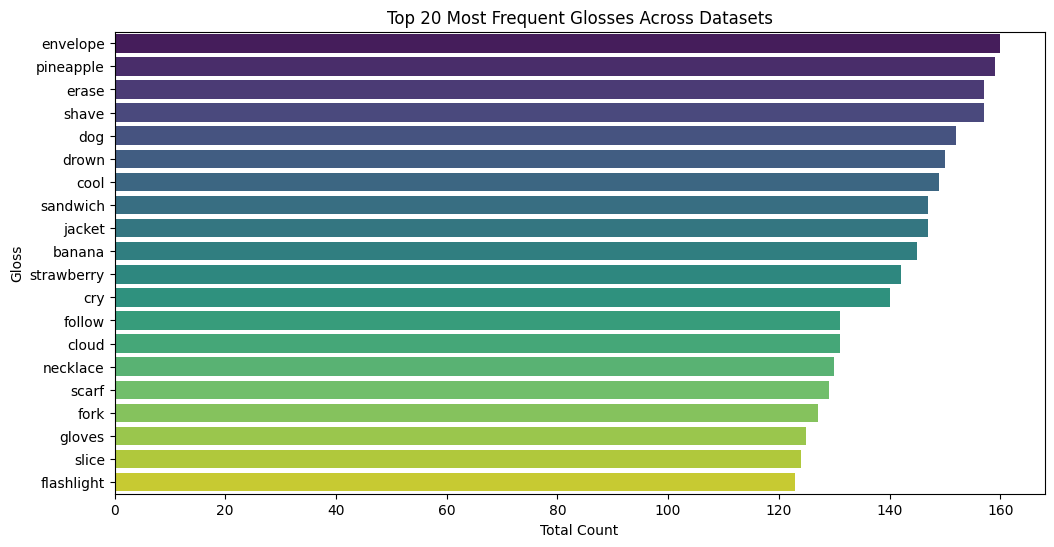

In [39]:
top20 = df.sort_values(by='Count', ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Gloss', data=top20, palette='viridis')
plt.title("Top 20 Most Frequent Glosses Across Datasets")
plt.xlabel("Total Count")
plt.ylabel("Gloss")
plt.show()

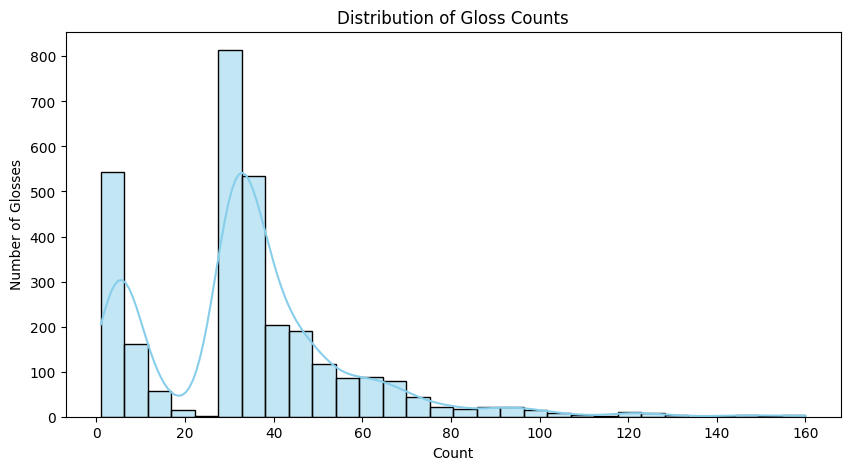

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['Count'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Gloss Counts")
plt.xlabel("Count")
plt.ylabel("Number of Glosses")
plt.show()

source
asl_citizen    2301
wlasl          2000
msasl          1000
Name: count, dtype: int64


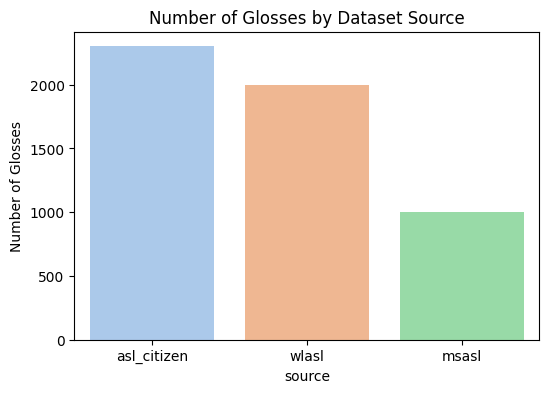

In [41]:
# Split multiple sources into separate rows for counting
df_sources = df.assign(source=df['source'].str.split(',')).explode('source')

# Count number of glosses per dataset
source_counts = df_sources['source'].value_counts()
print(source_counts)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='pastel')
plt.title("Number of Glosses by Dataset Source")
plt.ylabel("Number of Glosses")
plt.show()


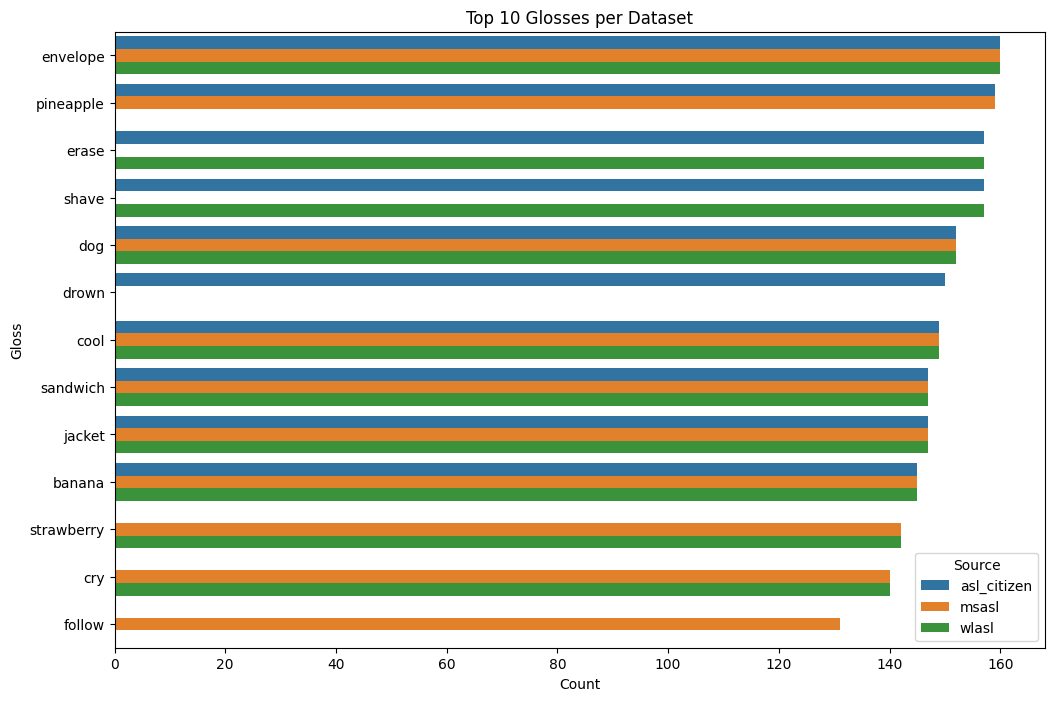

In [42]:
top_per_source = df_sources.groupby('source').apply(lambda x: x.nlargest(10, 'Count')).reset_index(drop=True)
plt.figure(figsize=(12,8))
sns.barplot(x='Count', y='Gloss', hue='source', data=top_per_source, dodge=True)
plt.title("Top 10 Glosses per Dataset")
plt.xlabel("Count")
plt.ylabel("Gloss")
plt.legend(title="Source")
plt.show()